In [3]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [12]:
# Directories - Change as desired
bca_file_path = "C:/Users/plutzer/Box/CellBio-MajorLab/Users/Isaac/Experiments/002_WNT_phospho_test/BCA_IBP_20220615_163558.xlsx"
figure_base = bca_file_path[:len(bca_file_path)-5]
expt_name = bca_file_path.split('/')[-1].split('.')[0]

In [13]:
# load file
df = pd.read_excel(bca_file_path,header=14)
df = df.set_index('Unnamed: 0')
mat = df.to_numpy()
df.index.names = [' ']
df

,1,2,3,4,5,6,7,8,9,10,11,12
,,,,,,,,,,,,
A,0.398,0.376,0.361,0.162,0.161,0.158,0.148,0.151,0.150,NaN,NaN,NaN
B,0.249,0.243,0.243,0.164,0.172,0.162,0.162,0.165,0.171,NaN,NaN,NaN
C,0.170,0.172,0.174,0.158,0.163,0.153,0.154,0.164,0.158,NaN,NaN,NaN
D,0.133,0.131,0.131,0.154,0.152,0.149,0.156,0.155,0.159,NaN,NaN,NaN
E,0.103,0.103,0.105,0.152,0.156,0.154,0.150,0.151,0.147,NaN,NaN,NaN
F,0.092,0.089,0.090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,0.081,0.082,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,0.071,0.074,0.074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Plate setup

# Standards go in the first n cols, using all the rows as shown below
row_order = ['A','B','C','D','E','F','G','H']

##### STANDARDS - listed in ug/mL ##### 
standards = {
    'A':1000,
    'B':500,
    'C':250,
    'D':125,
    'E':62.5,
    'F':31.3,
    'G':15.6,
    'H':0
}

# Add standards to ignore if you have some outliers
# ignore = ['B']
ignore = []

# Change if needed
num_standard_reps = 3

# Positions of samples
samples_positions = [
    [[0,3],[0,4],[0,5]],
    [[1,3],[1,4],[1,5]],
    [[2,3],[2,4],[2,5]],
    [[3,3],[3,4],[3,5]],
    [[4,3],[4,4],[4,5]],
    [[0,6],[0,7],[0,8]],
    [[1,6],[1,7],[1,8]],
    [[2,6],[2,7],[2,8]],
    [[3,6],[3,7],[3,8]],
    [[4,6],[4,7],[4,8]]
]

# Sample names corresponding to the above positions
samples_names = [
    'Control 1',
    'Control 2',
    'Control 3',
    'Control 4',
    'Control 5',
    'WNT3a 1',
    'WNT3a 2',
    'WNT3a 3',
    'WNT3a 4',
    'WNT3a 5'
]

In [15]:
# Generate points for the standard curve
concentrations_x = []
absorbances_y = []
for row in range(len(row_order)):
    if row_order[row] not in ignore:
        concentration = standards[row_order[row]]
        for col in range(num_standard_reps):
            concentrations_x.append(concentration)
            absorbances_y.append(mat[row,col])

# Add additional standards other than the main columns
additional_standards_list = [] #[[7,3],[7,4],[7,5]]
additional_standards_concentrations = [] #[0,0,0] 

for n in range(len(additional_standards_list)):
    concentrations_x.append(additional_standards_concentrations[n])
    absorbances_y.append(mat[additional_standards_list[n][0],additional_standards_list[n][1]])

Control 1:
	Mean Absorbance: 0.16033333333333333
	Interpolated Concentration: 223.43303362032472  ug/mL
Control 2:
	Mean Absorbance: 0.166
	Interpolated Concentration: 239.7232715674743  ug/mL
Control 3:
	Mean Absorbance: 0.158
	Interpolated Concentration: 216.76489651496138  ug/mL
Control 4:
	Mean Absorbance: 0.15166666666666664
	Interpolated Concentration: 198.77970665787333  ug/mL
Control 5:
	Mean Absorbance: 0.154
	Interpolated Concentration: 205.3866162710801  ug/mL
WNT3a 1:
	Mean Absorbance: 0.14966666666666664
	Interpolated Concentration: 193.13426815013486  ug/mL
WNT3a 2:
	Mean Absorbance: 0.166
	Interpolated Concentration: 239.7232715674743  ug/mL
WNT3a 3:
	Mean Absorbance: 0.15866666666666665
	Interpolated Concentration: 218.6677463864728  ug/mL
WNT3a 4:
	Mean Absorbance: 0.15666666666666665
	Interpolated Concentration: 212.96476392684312  ug/mL
WNT3a 5:
	Mean Absorbance: 0.14933333333333332
	Interpolated Concentration: 192.1949330564431  ug/mL


Text(0, 0.5, 'Net Absorbance (562nm)')

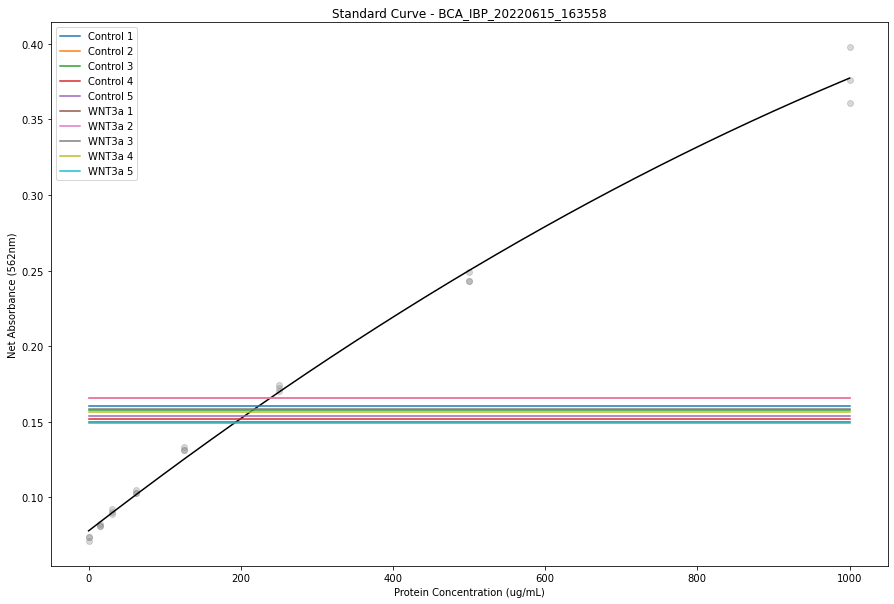

In [16]:
# Scatterplot of points
std_curve = plt.figure(figsize = (15,10))
plt.scatter(concentrations_x,absorbances_y,c='grey',alpha=0.3)

# Add a quadratic regression
model = np.poly1d(np.polyfit(concentrations_x,absorbances_y,2))
polyline = np.linspace(0,1000,1000)
plt.plot(polyline,model(polyline),c='black')


# Make interpolations for the samples
for samplenum in range(len(samples_positions)):
    sample_name = samples_names[samplenum]
    sample_abs = []
    for row,col in samples_positions[samplenum]:
        sample_abs.append(mat[row,col])
    # Get the mean absorbance and plot as a horizontal line
    plt.plot([0,1000],[np.mean(sample_abs)]*2,label=sample_name)
    print(sample_name + ':')
    print('\t' + 'Mean Absorbance: ' + str(np.mean(sample_abs)))
    
    # Interpolate the concentration for this sample using the minimum solution for the quadratic equation
    print('\t' + 'Interpolated Concentration: ' + str(np.min((model-np.mean(sample_abs)).r)) + '  ug/mL')

plt.legend()
plt.title('Standard Curve - ' + expt_name)
plt.xlabel('Protein Concentration (ug/mL)')
plt.ylabel('Net Absorbance (562nm)')

In [17]:
# Run this to save the figure
save_path = figure_base + '.png'
std_curve.savefig(save_path)

In [11]:
sample_conc = 819.9
desired_conc = 620
desired_vol = 250

amount_sample = desired_conc*desired_vol/sample_conc
amount_diluent = desired_vol-amount_sample

print("Add " + str(amount_sample) + " sample.")
print("Dilute with " + str(amount_diluent) + " diluent.")

Add 189.04744481034274 sample.
Dilute with 60.95255518965726 diluent.


In [3]:
(model-0.5).r

NameError: name 'model' is not defined

In [11]:
790*2

1580

In [13]:
np.mean([2360,2421])

2390.5

In [14]:
120/2.39

50.2092050209205